In [5]:
import osmnx as ox

# Define the location you want (can be a city, district, state, etc.)
location = "srinagar, India"  # You can change this to any place

# Get the boundary as a GeoDataFrame
gdf = ox.geocode_to_gdf(location)

# Save to GeoJSON file
gdf.to_file("prayagraj_area.geojson", driver="GeoJSON")

print("✅ GeoJSON boundary saved as 'your_area.geojson'")

✅ GeoJSON boundary saved as 'your_area.geojson'


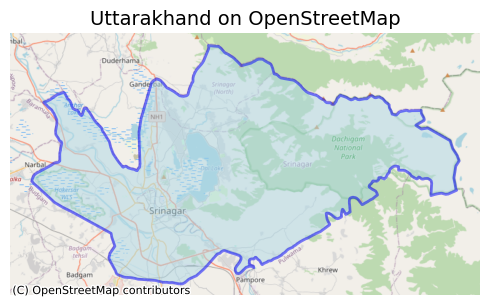

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx  # For OSM basemaps

# Load the GeoJSON boundary
gdf = gpd.read_file("prayagraj_area.geojson")

# Project to Web Mercator for tile overlay
gdf = gdf.to_crs(epsg=3857)

# Plot
fig, ax = plt.subplots(figsize=(5, 5))
gdf.plot(ax=ax, facecolor='lightblue', edgecolor='blue', linewidth=2, alpha=0.5)

# Add OpenStreetMap tiles
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Clean up
ax.set_title("Uttarakhand on OpenStreetMap", fontsize=14)
ax.set_axis_off()
plt.tight_layout()
plt.show()

In [7]:
# import requests
# import json

# # 🔐 Your credentials
# client_id = 'sh-dad2fc56-797f-4f2b-8c8d-bd4fe12e485e'
# client_secret = 'CxAZRHS8bOS8WGjm6mZHcSGVbVjV9Qp0'
# gdf = gdf.to_crs(epsg=4326)
# min_lon, min_lat, max_lon, max_lat = gdf.total_bounds
# bbox = [float(min_lon), float(min_lat), float(max_lon), float(max_lat)]



# # 🌐 Get access token
# token_response = requests.post(
#     "https://identity.dataspace.copernicus.eu/auth/realms/CDSE/protocol/openid-connect/token",
#     headers={"Content-Type": "application/x-www-form-urlencoded"},
#     data={
#         "grant_type": "client_credentials",
#         "client_id": client_id,
#         "client_secret": client_secret
#     }
# )

# access_token = token_response.json()["access_token"]

# # ⚙️ Step 2: Set headers
# headers = {
#     "Authorization": f"Bearer {access_token}",
#     "Content-Type": "application/json"
# }

# # 🧠 Step 3: Evalscript (NDVI, NDBI, MNDWI, SAVI)
# evalscript = """
# //VERSION=3
# function setup() {
#   return {
#     input: ["B02", "B03", "B04", "B08", "B11"],
#     output: {
#       bands: 4,
#       sampleType: "FLOAT32"
#     }
#   };
# }

# function evaluatePixel(sample) {
#   let ndvi = (sample.B08 - sample.B04) / (sample.B08 + sample.B04);
#   let ndbi = (sample.B11 - sample.B08) / (sample.B11 + sample.B08);
#   let mndwi = (sample.B03 - sample.B11) / (sample.B03 + sample.B11);
#   let L = 0.5;
#   let savi = ((sample.B08 - sample.B04) / (sample.B08 + sample.B04 + L)) * (1 + L);
#   return [ndvi, ndbi, mndwi, savi,sample.B04, sample.B03, sample.B02];
# }
# """

# # 🛰️ Step 4: Process request
# payload = {
#     "input": {
#         "bounds": {
#             "bbox": bbox,
#             "properties": {
#                 "crs": "http://www.opengis.net/def/crs/EPSG/0/4326"
#             }
#         },
#         "data": [{
#             "type": "sentinel-2-l2a",
#             "dataFilter": {
#                 "timeRange": {
#                     "from": "2024-12-01T00:00:00Z",
#                     "to": "2024-12-10T23:59:59Z"
#                 },
#                 "maxCloudCoverage": 20
#             }
#         }]
#     },
#     "output": {
#         "width": 512,
#         "height": 512,
#         "responses": [{
#             "identifier": "default",
#             "format": {
#                 "type": "image/tiff"
#             }
#         }]
#     },
#     "evalscript": evalscript
# }

# response = requests.post(
#     url="https://sh.dataspace.copernicus.eu/api/v1/process",
#     headers=headers,
#     data=json.dumps(payload)
# )

# # 💾 Step 5: Save the raster
# with open("combined_indices.tif", "wb") as f:
#     f.write(response.content)

# print("✅ Combined raster (NDVI, NDBI, MNDWI, SAVI) saved as 'combined_indices.tif'")


In [8]:
# import rasterio
# import matplotlib.pyplot as plt
# import numpy as np
# with rasterio.open("combined_indices.tif") as src:
#     ndvi = src.read(1)
#     ndbi = src.read(2)
#     mndwi = src.read(3)
#     savi = src.read(4)
    
# print(np.mean(mndwi))
# fig, axes = plt.subplots(5,  figsize=(16, 16))

# axes[0].imshow(ndvi, cmap="Greys")
# axes[ 0].set_title("NDVI")
# axes[ 0].axis("off")

# op=axes[1].imshow(ndbi, cmap="Greys")
# axes[1].set_title("NDBI")
# axes[1].axis("off")
# fig.colorbar(op, ax=axes[1], fraction=0.046, pad=0.04)




# im=axes[2].imshow(mndwi, cmap="Greys")
# axes[2].set_title("MNDWI")
# axes[2].axis("off")
# fig.colorbar(im, ax=axes[2], fraction=0.046, pad=0.04)


# axes[3].imshow(savi, cmap="YlGn")
# axes[3].set_title("SAVI")
# axes[3].axis("off")

# axes[4].imshow(savi, cmap="YlGn")
# axes[4].set_title("SAVI")
# axes[4].axis("off")

# plt.tight_layout()
# plt.show()


In [9]:
# import rasterio
# import matplotlib.pyplot as plt
# import numpy as np
# from matplotlib.colors import ListedColormap
# with rasterio.open("combined_indices.tif") as src:
#     ndvi = src.read(1)
#     ndbi = src.read(2)
#     mndwi = src.read(3)
#     savi = src.read(4)
    
# #  Initialize a blank classification map
# # 0: background, 1: forest, 2: urban, 3: water


# w_th=(np.nanmax(mndwi)+np.nanmin(mndwi))*0.5
# print(mndwi.max())
# landcover = np.zeros_like(ndvi, dtype=np.uint8)

# # Apply rules
# landcover[(ndvi > 0.2) & (ndbi < 0.2)] = 1  # Forest
# landcover[(ndvi > 0.3) & (ndbi < 0.2)] = 4  # dense Forest

# landcover[(ndbi > 0.1) &(mndwi < -0.5)] = 2  # Urban
# landcover[binary_int64==0 ] = 3                  # Water

# # Define color map
# cmap = ListedColormap(["beige", "lightgreen", "grey","blue","darkgreen"])
# labels = ["Background", "Forest","urban", "Water","dense forest"]

# # Plot
# fig, ax = plt.subplots(figsize=(8, 8))
# im = ax.imshow(landcover, cmap=cmap)

# cbar = plt.colorbar(im, ax=ax, ticks=[0, 1, 2, 3,4])
# cbar.ax.set_yticklabels(labels)
# plt.title("Land Cover Classification")
# plt.axis("off")
# plt.show()

In [10]:
import ee
import geemap

# Authenticate and initialize
ee.Initialize(project='landcover-464306')

# Define your region of interest
# Example: bbox = ee.Geometry.BBox(minLon, minLat, maxLon, maxLat)
# bbox = ee.Geometry.BBox(77.9, 27.1, 78.2, 27.3)  # Replace with your own bbox
gdf = gdf.to_crs(epsg=4326)
min_lon, min_lat, max_lon, max_lat = gdf.total_bounds
bbox = ee.Geometry.BBox(float(min_lon), float(min_lat), float(max_lon), float(max_lat))
# Load Sentinel-2 image and apply filters
print(bbox)
sentinel = ee.ImageCollection("COPERNICUS/S2_SR") \
    .filterBounds(bbox) \
    .filterDate("2023-09-01", "2023-10-01") \
    .filter(ee.Filter.lt("CLOUDY_PIXEL_PERCENTAGE", 10)) \
    .select(["B3", "B4", "B8", "B11"]) \
    .median()

# Compute vegetation and land indices
ndvi = sentinel.normalizedDifference(["B8", "B4"]).rename("NDVI")
ndbi = sentinel.normalizedDifference(["B11", "B8"]).rename("NDBI")
mndwi = sentinel.normalizedDifference(["B3", "B11"]).rename("MNDWI")

# Stack the indices together
indices = ndvi.addBands([ndbi, mndwi])

# Sample pixels for unsupervised clustering
sample = indices.sample(region=bbox, scale=10, numPixels=5000, seed=42)

# Cluster into 5 land cover classes
clusterer = ee.Clusterer.wekaKMeans(5).train(sample)
clusters = indices.cluster(clusterer)

# Color palette for 5 clusters
cluster_palette = ['beige', 'grey', 'blue', 'green', 'beige']

# Visualize NDVI and clusters
Map = geemap.Map(center=[27.2, 78.0], zoom=12)
Map.addLayer(ndvi, {"min": 0, "max": 1, "palette": ['white', 'green']}, "NDVI")
Map.addLayer(mndwi, {"min": 0, "max": 1, "palette": ['white', 'blue']}, "NDWI")

Map.addLayer(clusters, {"min": 0, "max": 4, "palette": cluster_palette}, "Land Cover Clusters")

Map


ee.Geometry({
  "functionInvocationValue": {
    "functionName": "GeometryConstructors.Polygon",
    "arguments": {
      "coordinates": {
        "constantValue": [
          [
            [
              74.6680892,
              34.22834970000001
            ],
            [
              74.6680892,
              34.00770820000001
            ],
            [
              75.1458404,
              34.00770820000001
            ],
            [
              75.1458404,
              34.22834970000001
            ]
          ]
        ]
      },
      "geodesic": {
        "constantValue": false
      }
    }
  }
})


Map(center=[27.2, 78.0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(…

In [11]:
# Define export parameters
vis_params = {
    "min": 0,
    "max": 4,
    "palette": ['beige', 'grey', 'blue', 'green', 'grey']
}
visualized = clusters.visualize(**vis_params)
export_task = ee.batch.Export.image.toDrive(
    image=visualized,
    description='land_cover_clusters_export',
    folder='GEE_exports',  # This folder will be created in your Google Drive
    fileNamePrefix='land_cover_clustersv',
    region=bbox,
    scale=10,
    maxPixels=1e13,
    fileFormat='GeoTIFF',
)

# Start export
export_task.start()
print(export_task.status())
print("✅ Export task started. Check https://code.earthengine.google.com/tasks to monitor.")


{'state': 'READY', 'description': 'land_cover_clusters_export', 'priority': 100, 'creation_timestamp_ms': 1751197591742, 'update_timestamp_ms': 1751197591742, 'start_timestamp_ms': 0, 'task_type': 'EXPORT_IMAGE', 'id': 'V2JCHBFGV7Q5WO64K3HDO5F3', 'name': 'projects/landcover-464306/operations/V2JCHBFGV7Q5WO64K3HDO5F3'}
✅ Export task started. Check https://code.earthengine.google.com/tasks to monitor.
